<a href="https://colab.research.google.com/github/siddusuhaas/LEARNING-REFERENCES/blob/master/forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
print("hello")

hello


In [23]:
pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
#webscraping from html to python
import pandas as pd
df1=pd.read_html("/DailyWiseMarketArrivals.html")
print(df1)

[                                      0
0  DATE WISE MARKET ARRIVALS AND PRICES,           0                                                  1        2  \
0    Crop :              Select  Garlic  Onion  Potato  Tomato   Year :   
1  Market :  All  ABOHAR(PB)  AGRA(UP)  AHMEDABAD(GUJ)  AHM...  Month :   
2       NaN                                                NaN      NaN   

                                                   3  
0  All  2022  2021  2020  2019  2018  2017  2016 ...  
1  All  January  February  March  April  May  Jun...  
2                                                NaN  ,                                                 0
0  DATE WISE MARKET ARRIVALS AND PRICES FOR ONION,              Date     Market  Arrival(q)  Price Minimum (Rs/q)  \
0     01/Jan/2004  BANGALORE        6340                  1000   
1     02/Jan/2004  BANGALORE         499                   440   
2     03/Jan/2004  BANGALORE        9957                  1000   
3     05/Jan/2004  BANGALORE   

In [25]:
import pandas as pd
df=pd.read_html("/DailyWiseMarketArrivals.html")[-1]
print(df)

             Date     Market  Arrival(q)  Price Minimum (Rs/q)  \
0     01/Jan/2004  BANGALORE        6340                  1000   
1     02/Jan/2004  BANGALORE         499                   440   
2     03/Jan/2004  BANGALORE        9957                  1000   
3     05/Jan/2004  BANGALORE       11937                  1000   
4     06/Jan/2004  BANGALORE        9613                  1000   
...           ...        ...         ...                   ...   
1620  03/Mar/2010  BANGALORE        9169                   400   
1621  04/Mar/2010  BANGALORE        8345                   250   
1622  05/Mar/2010  BANGALORE       11448                   400   
1623  06/Mar/2010  BANGALORE       13098                   500   
1624  08/Mar/2010  BANGALORE       21672                   500   

      Price Maximum (Rs/q)  Modal Price (Rs/q)  
0                   1100.0              1050.0  
1                    540.0               490.0  
2                   1100.0              1050.0  
3          

In [26]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1625 non-null   object 
 1   Market                1625 non-null   object 
 2   Arrival(q)            1625 non-null   int64  
 3   Price Minimum (Rs/q)  1625 non-null   int64  
 4   Price Maximum (Rs/q)  1624 non-null   float64
 5   Modal Price (Rs/q)    1624 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 76.3+ KB


Date                    0
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    1
Modal Price (Rs/q)      1
dtype: int64

In [27]:
df_new=df[['Date','Modal Price (Rs/q)']]
print(df_new)
df_new=df_new.dropna()  #dropping entire null row


             Date  Modal Price (Rs/q)
0     01/Jan/2004              1050.0
1     02/Jan/2004               490.0
2     03/Jan/2004              1050.0
3     05/Jan/2004              1050.0
4     06/Jan/2004              1050.0
...           ...                 ...
1620  03/Mar/2010               700.0
1621  04/Mar/2010               700.0
1622  05/Mar/2010               750.0
1623  06/Mar/2010               900.0
1624  08/Mar/2010                 NaN

[1625 rows x 2 columns]


In [28]:
#renaming the rows and columns
df_new.rename(columns={'Date':'ds','Modal Price (Rs/q)':'y'},inplace = True)
print(df_new)
df_new.info()

               ds       y
0     01/Jan/2004  1050.0
1     02/Jan/2004   490.0
2     03/Jan/2004  1050.0
3     05/Jan/2004  1050.0
4     06/Jan/2004  1050.0
...           ...     ...
1619  02/Mar/2010   700.0
1620  03/Mar/2010   700.0
1621  04/Mar/2010   700.0
1622  05/Mar/2010   750.0
1623  06/Mar/2010   900.0

[1624 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1624 entries, 0 to 1623
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      1624 non-null   object 
 1   y       1624 non-null   float64
dtypes: float64(1), object(1)
memory usage: 38.1+ KB


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
#changing the datatype
df_new['ds']=pd.to_datetime(df_new['ds'])
print(df_new)
df_new['y']=df_new['y'].astype(int)
df_new.info()

             ds       y
0    2004-01-01  1050.0
1    2004-01-02   490.0
2    2004-01-03  1050.0
3    2004-01-05  1050.0
4    2004-01-06  1050.0
...         ...     ...
1619 2010-03-02   700.0
1620 2010-03-03   700.0
1621 2010-03-04   700.0
1622 2010-03-05   750.0
1623 2010-03-06   900.0

[1624 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1624 entries, 0 to 1623
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1624 non-null   datetime64[ns]
 1   y       1624 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 38.1 KB


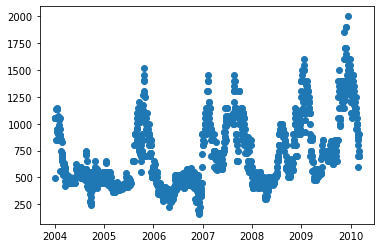

<Figure size 1440x648 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt
plt.scatter(df_new['ds'],df_new['y'])
plt.figure(figsize=(20,9))
plt.show()

In [33]:
#outliers in graph are replaced with nan
import numpy as np
df_new['y']=np.where(df_new['y']>5000,np.nan,df_new['y'])
print(df_new)
df_new.isnull().sum()

             ds       y
0    2004-01-01  1050.0
1    2004-01-02   490.0
2    2004-01-03  1050.0
3    2004-01-05  1050.0
4    2004-01-06  1050.0
...         ...     ...
1619 2010-03-02   700.0
1620 2010-03-03   700.0
1621 2010-03-04   700.0
1622 2010-03-05   750.0
1623 2010-03-06   900.0

[1624 rows x 2 columns]


ds    0
y     0
dtype: int64

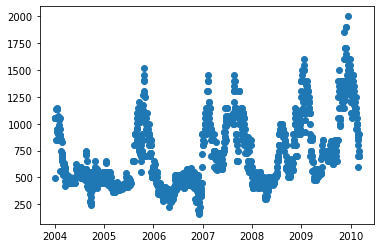

<Figure size 1440x1080 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt
plt.scatter(df_new['ds'],df_new['y'])
plt.figure(figsize=(20,15))
plt.show()

In [36]:
#forecasting(fbprophet)

In [38]:
import fbprophet
op=fbprophet.Prophet()
op.fit(df_new)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
